In [1]:
!pip install yfinance mplfinance pmdarima sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 3.9 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 37.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 6.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-cp310-cp310-linux_x86_64.whl size=275728 sha256=5be5fb9930ae2702788a957847dd3e15f241f14dd381f57e402d7ef57f266a71
  Stored in directory: /root/.cache/pip/wheels/4b/b9/b0/83d6e258e8f963f5ff111a2cd8c483ca59372a86e6a2535212
Successfully built peewee


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mplfinance as mpf
import numpy as np

In [69]:
ticker = "FPT.VN"
start_date = "2014-01-01"
end_date = "2024-09-01"
data = yf.download(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [70]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,9430.621094,9470.245117,9351.372070,9390.996094,9193.407227,1047167
2014-01-03,9371.184570,9390.996094,9311.747070,9371.184570,9174.011719,984788
2014-01-06,9371.184570,9509.870117,9311.747070,9509.870117,9309.780273,1522633
2014-01-07,9509.870117,9509.870117,9410.808594,9410.808594,9212.802734,1468728
2014-01-08,9390.996094,9509.870117,9390.996094,9470.245117,9270.988281,654134
...,...,...,...,...,...,...
2024-08-23,133700.000000,133700.000000,132400.000000,133100.000000,133100.000000,3325001
2024-08-26,133300.000000,133500.000000,131500.000000,131500.000000,131500.000000,2758200
2024-08-28,133000.000000,134500.000000,132900.000000,133300.000000,133300.000000,2909701


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,9430.621094,9470.245117,9351.372070,9390.996094,9193.407227,1047167
2014-01-03,9371.184570,9390.996094,9311.747070,9371.184570,9174.011719,984788
2014-01-06,9371.184570,9509.870117,9311.747070,9509.870117,9309.780273,1522633
2014-01-07,9509.870117,9509.870117,9410.808594,9410.808594,9212.802734,1468728
2014-01-08,9390.996094,9509.870117,9390.996094,9470.245117,9270.988281,654134


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-23,133700.0,133700.0,132400.0,133100.0,133100.0,3325001
2024-08-26,133300.0,133500.0,131500.0,131500.0,131500.0,2758200
2024-08-28,133000.0,134500.0,132900.0,133300.0,133300.0,2909701
2024-08-29,132800.0,133800.0,132200.0,133700.0,133700.0,2637701
2024-08-30,133500.0,134900.0,133000.0,134800.0,134800.0,3379800


In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2657.000000,2657.000000,2657.000000,2657.000000,2657.000000,2.657000e+03
mean,35918.103785,36318.892227,35552.207806,35933.901974,35325.862936,3.833465e+06
std,28310.069724,28642.459308,28004.120445,28333.927534,28115.747488,3.361529e+06
min,9371.184570,9390.996094,9311.747070,9371.184570,9174.011719,2.922720e+05
25%,14148.903320,14279.911133,13992.386719,14116.212891,13819.204102,1.812332e+06
50%,22523.613281,22862.597656,22298.376953,22523.613281,22049.708984,2.981710e+06
75%,58664.144531,59168.242188,58071.832031,58664.144531,57429.832031,4.857369e+06
max,139100.000000,139700.000000,137500.000000,139600.000000,139600.000000,7.662164e+07


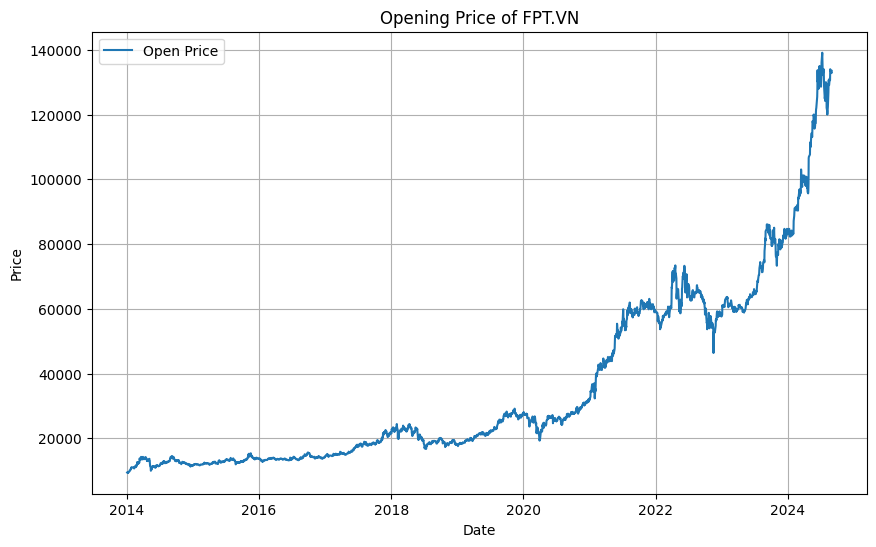

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(data['Open'], label='Open Price')
plt.title(f'Opening Price of {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

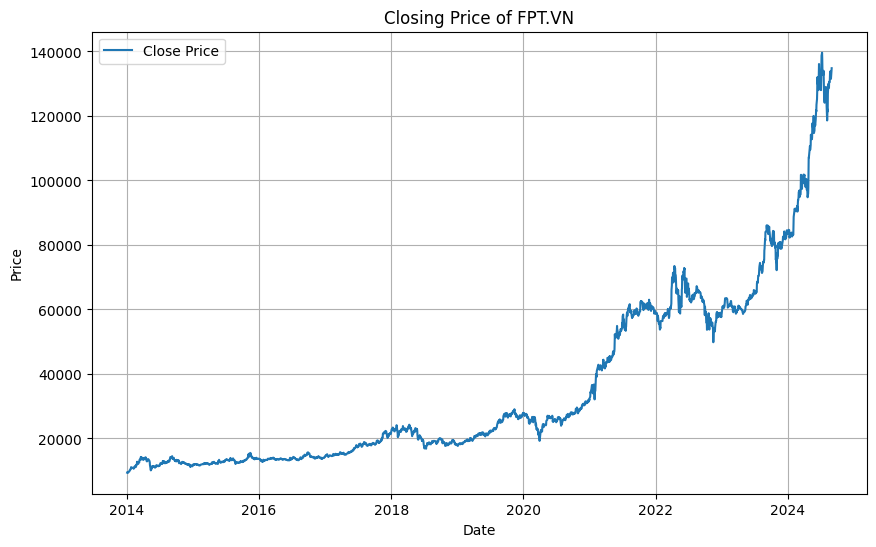

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.title(f'Closing Price of {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

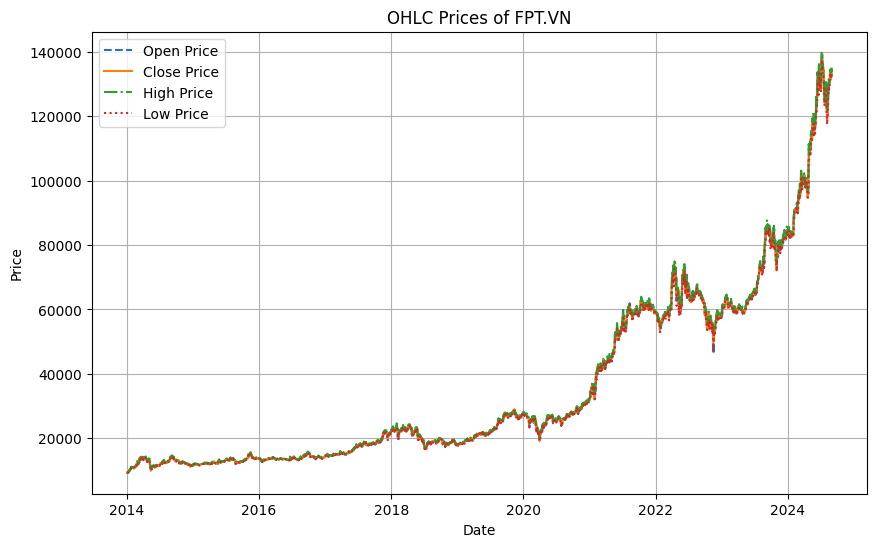

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(data['Open'], label='Open Price', linestyle='--')
plt.plot(data['Close'], label='Close Price', linestyle='-')
plt.plot(data['High'], label='High Price', linestyle='-.')
plt.plot(data['Low'], label='Low Price', linestyle=':')
plt.title(f'OHLC Prices of {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


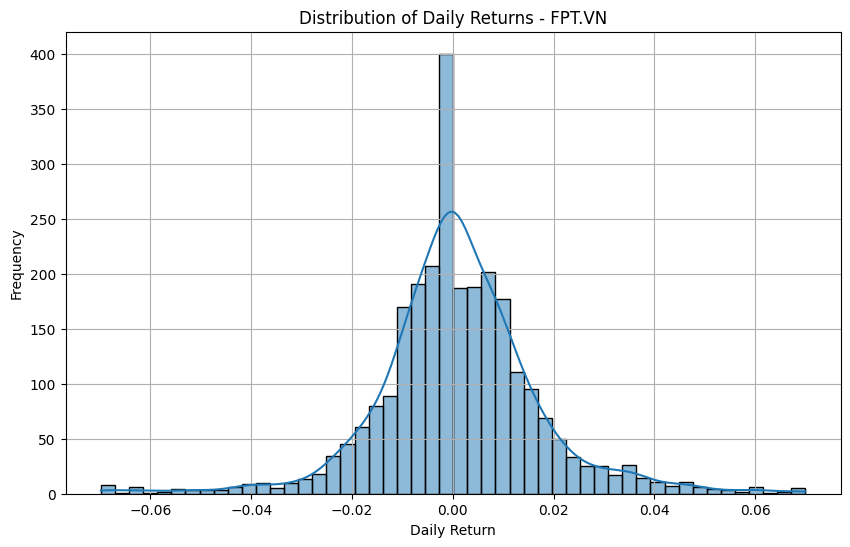

In [11]:
data['Daily Return'] = data['Close'].pct_change()

plt.figure(figsize=(10, 6))
sns.histplot(data['Daily Return'].dropna(), bins=50, kde=True)
plt.title(f'Distribution of Daily Returns - {ticker}')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

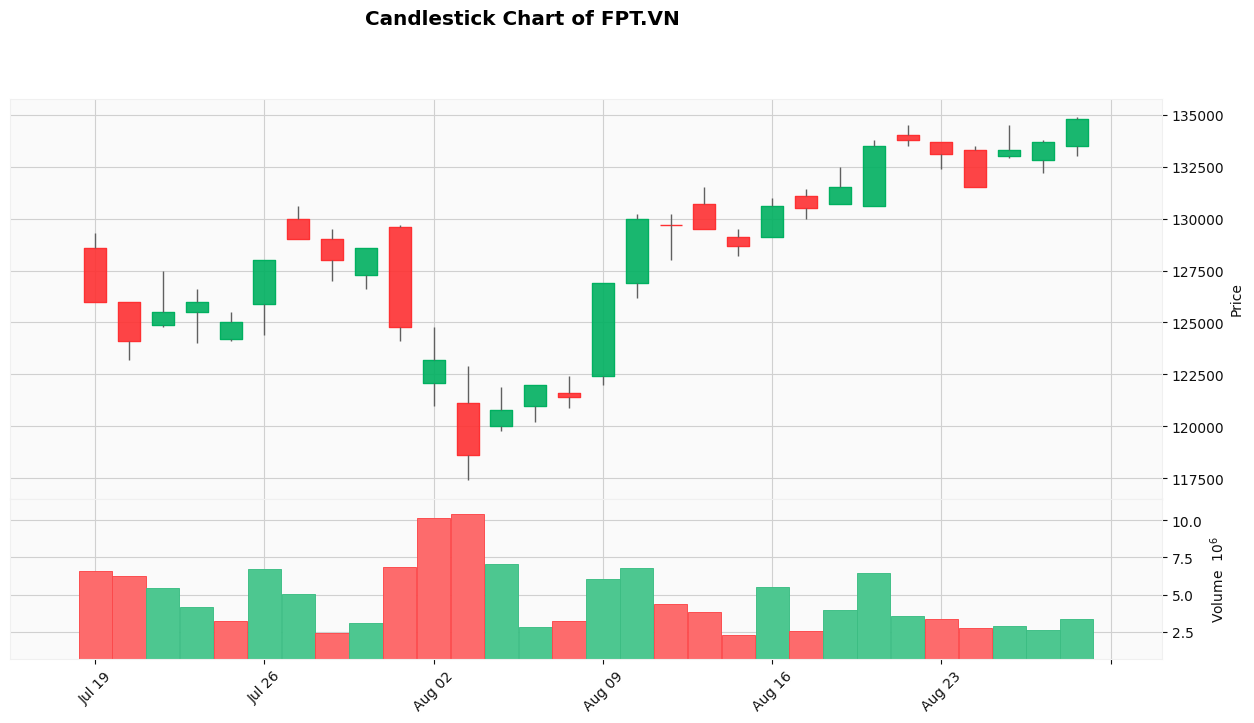

In [12]:
recent_data = data[-30:]
mpf.plot(recent_data, type='candle', volume=True, style='yahoo', title=f'Candlestick Chart of {ticker}', figsize=(16,8))

REGRESSION MODEL

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb
from sktime.utils.plotting import plot_series

In [14]:
data

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2014-01-02,9430.621094,9470.245117,9351.372070,9390.996094,9193.407227,1047167,NaN
2014-01-03,9371.184570,9390.996094,9311.747070,9371.184570,9174.011719,984788,-0.002110
2014-01-06,9371.184570,9509.870117,9311.747070,9509.870117,9309.780273,1522633,0.014799
2014-01-07,9509.870117,9509.870117,9410.808594,9410.808594,9212.802734,1468728,-0.010417
2014-01-08,9390.996094,9509.870117,9390.996094,9470.245117,9270.988281,654134,0.006316
...,...,...,...,...,...,...,...
2024-08-23,133700.000000,133700.000000,132400.000000,133100.000000,133100.000000,3325001,-0.005232
2024-08-26,133300.000000,133500.000000,131500.000000,131500.000000,131500.000000,2758200,-0.012021
2024-08-28,133000.000000,134500.000000,132900.000000,133300.000000,133300.000000,2909701,0.013688


In [15]:
X = data[['Open', 'High', 'Low', 'Volume']].values
y = data['Close'].values

In [17]:
X

array([[   9430.62109375,    9470.24511719,    9351.37207031,
        1047167.        ],
       [   9371.18457031,    9390.99609375,    9311.74707031,
         984788.        ],
       [   9371.18457031,    9509.87011719,    9311.74707031,
        1522633.        ],
       ...,
       [ 133000.        ,  134500.        ,  132900.        ,
        2909701.        ],
       [ 132800.        ,  133800.        ,  132200.        ,
        2637701.        ],
       [ 133500.        ,  134900.        ,  133000.        ,
        3379800.        ]])

In [19]:
y

array([  9390.99609375,   9371.18457031,   9509.87011719, ...,
       133300.        , 133700.        , 134800.        ])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}

In [42]:
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    })

In [44]:
performance_df = pd.DataFrame(results)
performance_df

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,185.155253,1.157130e+05,340.166159,0.999841
1,Decision Tree,308.202288,3.286999e+05,573.323550,0.999549
2,Random Forest,234.713297,1.706379e+05,413.083394,0.999766
3,Support Vector Regression,19237.999747,8.740226e+08,29563.874064,-0.200071


In [45]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [46]:
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})

In [49]:
print(data1)

           Actual     Predicted
0    15655.499023  15636.235588
1    12085.459961  12049.195853
2    26443.587891  26735.351843
3    25232.185547  25203.725138
4    14279.911133  14210.495511
..            ...           ...
527  90521.742188  90548.335841
528  27944.439453  27904.626730
529  17438.851562  17403.490800
530  19080.099609  19096.964405
531  71833.648438  71199.917460

[532 rows x 2 columns]


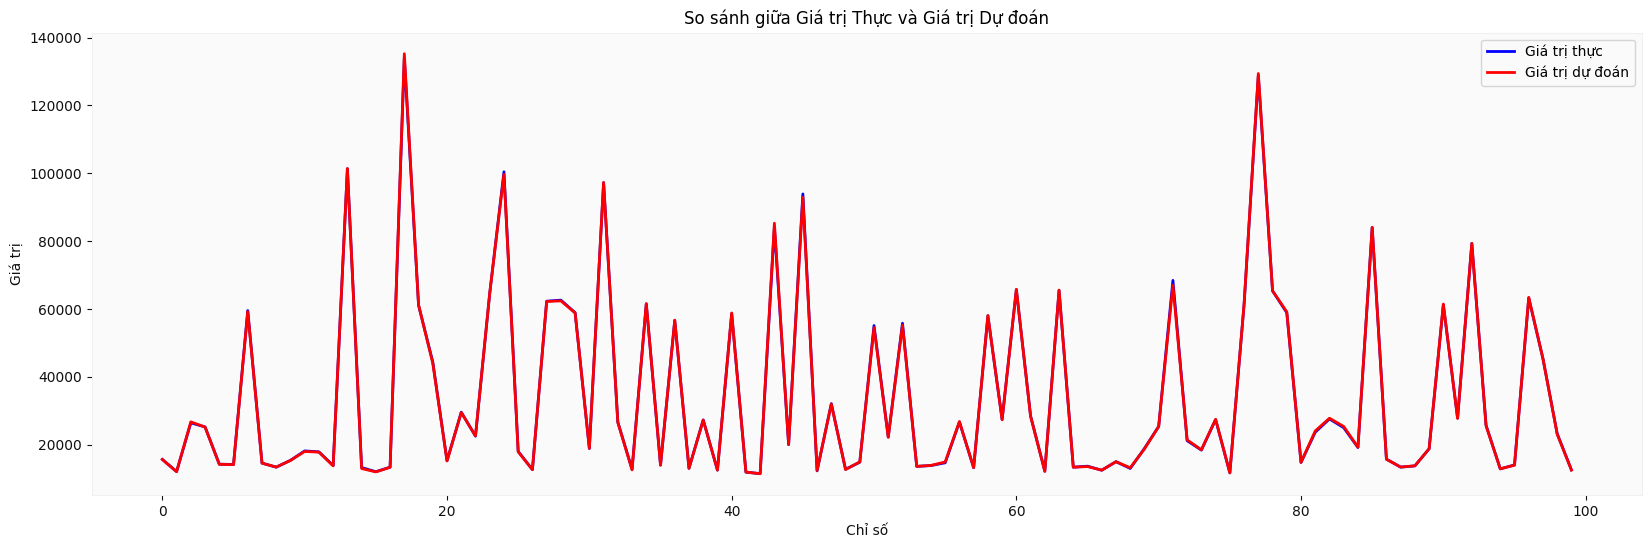

In [47]:
plt.figure(figsize=(20, 6))
plt.plot(data1['Actual'][:100], label='Giá trị thực', color='blue', linewidth=2)
plt.plot(data1['Predicted'][:100], label='Giá trị dự đoán', color='red', linewidth=2)

plt.title('So sánh giữa Giá trị Thực và Giá trị Dự đoán')
plt.xlabel('Chỉ số')
plt.ylabel('Giá trị')
plt.legend()
plt.grid()

plt.show()

LSTM Model

In [71]:
data_lstm = data.copy()

In [72]:
data = data_lstm.filter(['Close'])

In [73]:
dataset = data.values

In [74]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2525

In [76]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.52128570e-04],
       [0.00000000e+00],
       [1.06493748e-03],
       ...,
       [9.51623610e-01],
       [9.54695127e-01],
       [9.63141798e-01]])

In [85]:
train_data_lstm = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data_lstm)):
    x_train.append(train_data_lstm[i-60:i, 0])
    y_train.append(train_data_lstm[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00015213, 0.        , 0.00106494, 0.00030426, 0.00076067,
       0.00167347, 0.00212987, 0.00273841, 0.00289054, 0.00410761,
       0.00486829, 0.00638962, 0.0071503 , 0.00867164, 0.00867164,
       0.01095365, 0.01323565, 0.01247499, 0.01095365, 0.0094323 ,
       0.01247499, 0.01171431, 0.014757  , 0.014757  , 0.01399632,
       0.01323565, 0.014757  , 0.01779967, 0.014757  , 0.01627833,
       0.01856035, 0.02160302, 0.02616704, 0.02388503, 0.02540637,
       0.02160302, 0.02084236, 0.02236369, 0.02312436, 0.02388503,
       0.02464571, 0.02997039, 0.03073106, 0.03149173, 0.03073106,
       0.03073106, 0.03605575, 0.03757709, 0.03605575, 0.03681642,
       0.03605575, 0.03377374, 0.03149173, 0.03149173, 0.03529508,
       0.03453442, 0.03301307, 0.03149173, 0.0322524 , 0.03149173])]
[0.033773742305900925]

[array([0.00015213, 0.        , 0.00106494, 0.00030426, 0.00076067,
       0.00167347, 0.00212987, 0.00273841, 0.00289054, 0.00410761,
       0.00486829, 0.00638962, 0.0

In [86]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [87]:
history_lstm = model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
2465/2465 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0011
Epoch 2/10
2465/2465 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 1.6533e-04
Epoch 3/10
2465/2465 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 1.5340e-04
Epoch 4/10
2465/2465 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 1.5798e-04
Epoch 5/10
2465/2465 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 9.3902e-05
Epoch 6/10
2465/2465 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 1.1139e-04
Epoch 7/10
2465/2465 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 1.1049e-04
Epoch 8/10
2465/2465 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 8.2566e-05
Epoch 9/10
2465/2465 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 9.0462e-05
Epoch 10/10
2465/2465 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 7.3444e-05


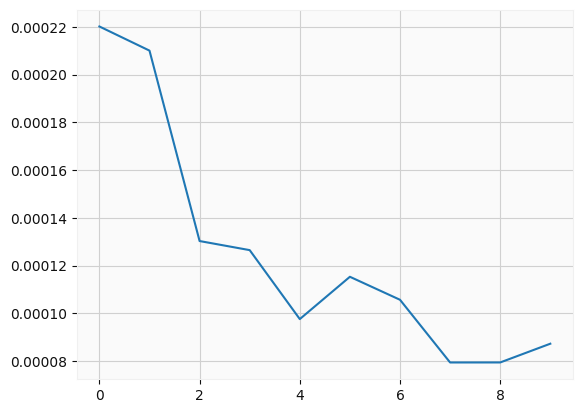

In [90]:
plt.plot(hisory_lstm.history['loss'])

In [91]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [92]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [93]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [94]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2936.081205600612

In [95]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/tmp/ipykernel_36/2657761684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


In [96]:
valid

,Close,Predictions
Date,,
2024-02-22,90956.523438,94600.312500
2024-02-23,90347.828125,92935.804688
2024-02-26,93913.046875,92587.484375
2024-02-27,93826.085938,96705.164062
2024-02-28,94347.828125,95833.062500
...,...,...
2024-08-23,133100.000000,135939.750000
2024-08-26,131500.000000,135210.984375
2024-08-28,133300.000000,133561.843750


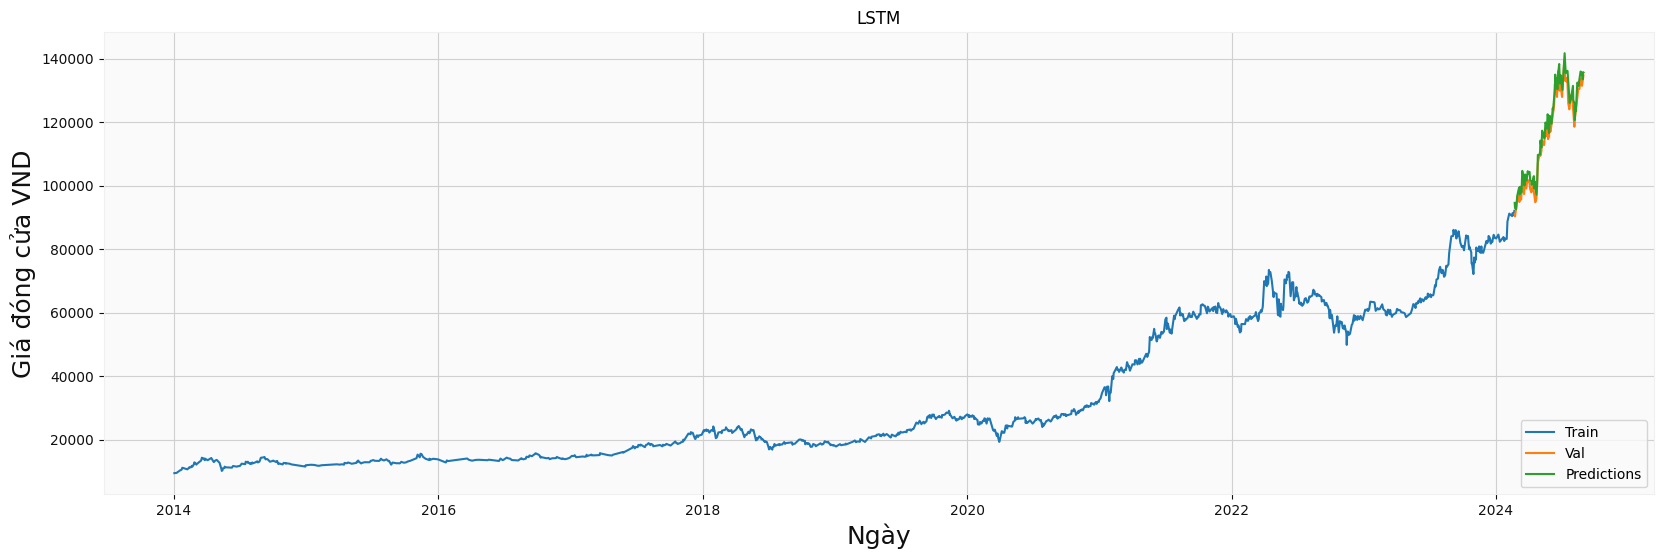

In [99]:
plt.figure(figsize=(20,6))
plt.title('LSTM')
plt.xlabel('Ngày', fontsize=18)
plt.ylabel('Giá đóng cửa VND', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()